In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
# Load your dataset
df = pd.read_csv("ds.csv")



In [3]:
# Preview data
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [5]:
df.shape

(375, 6)

In [6]:
# Check for missing values
df.isnull().sum()


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
print(df['Job Title'].value_counts())


Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64


In [8]:
print(df['Gender'].value_counts())


Gender
Male      194
Female    179
Name: count, dtype: int64


In [9]:
df['Job Title'].replace({'?': 'Others'}, inplace=True)
print(df['Job Title'].value_counts())


Job Title
Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: count, Length: 174, dtype: int64


In [10]:
print(df['Education Level'].value_counts())

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64


In [11]:
df.shape

(375, 6)

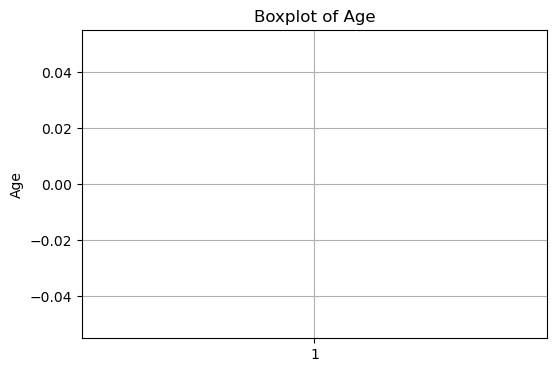

In [12]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age'])
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.grid(True)
plt.show()


In [13]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


<Axes: >

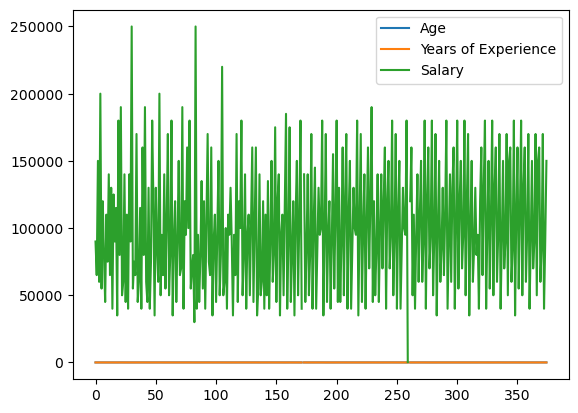

In [14]:
df.plot()

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode Gender (2 categories)
df['Gender'] = encoder.fit_transform(df['Gender'])

# Encode Education Level
df['Education Level'] = encoder.fit_transform(df['Education Level'])

# Encode Job Title
df['Job Title'] = encoder.fit_transform(df['Job Title'])


C:\Users\BHAGYASHREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


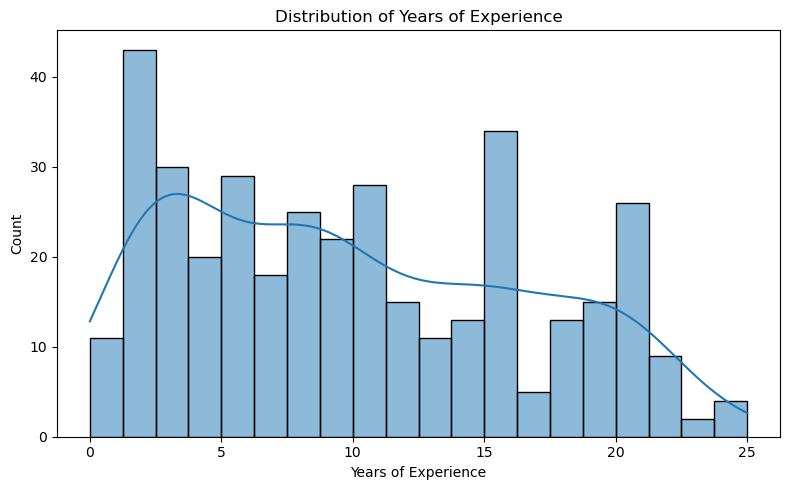

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Years of Experience"], bins=20, kde=True)
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


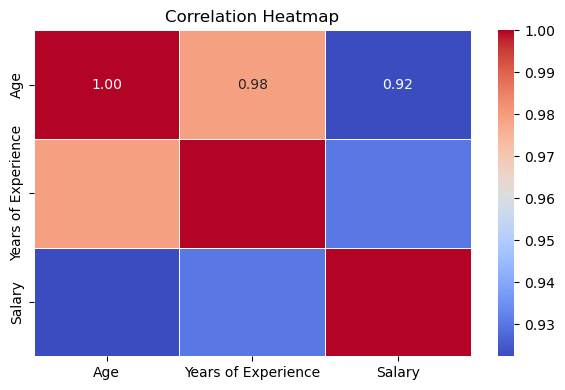

In [17]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
numerical_cols = ['Age', 'Years of Experience', 'Salary']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


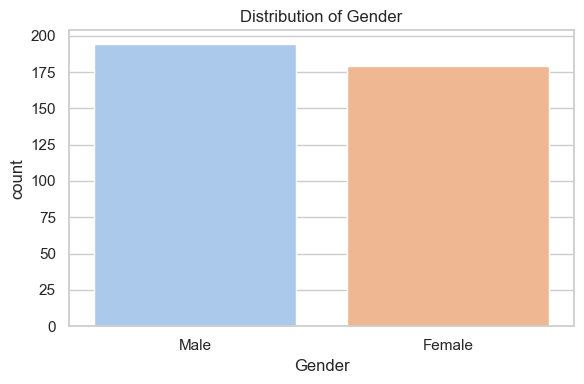

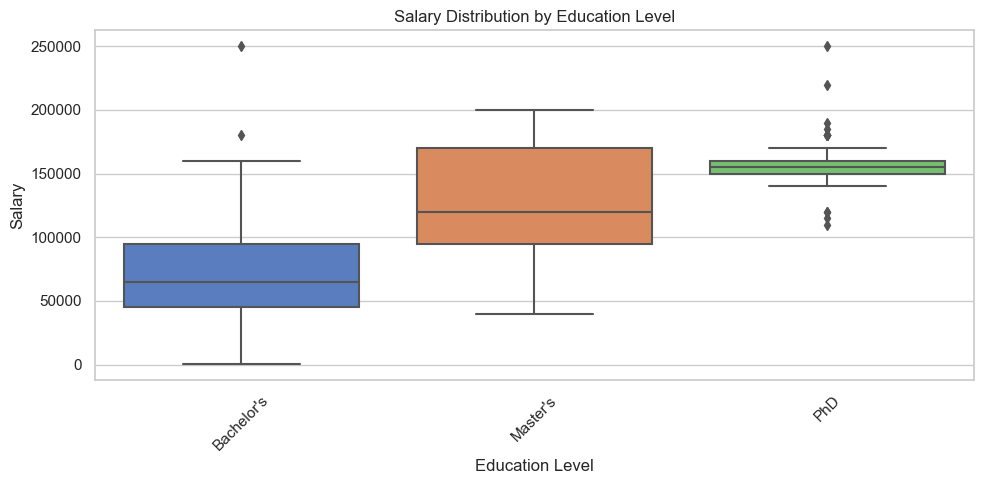

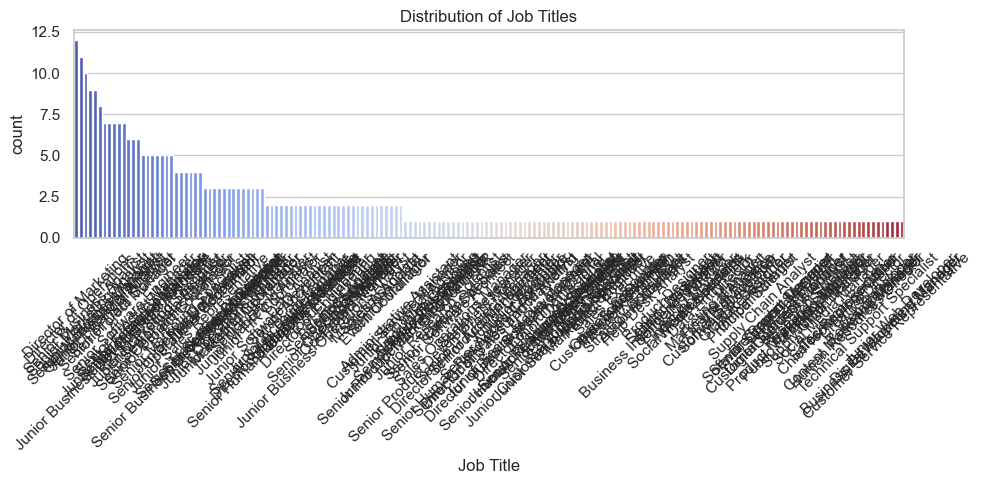

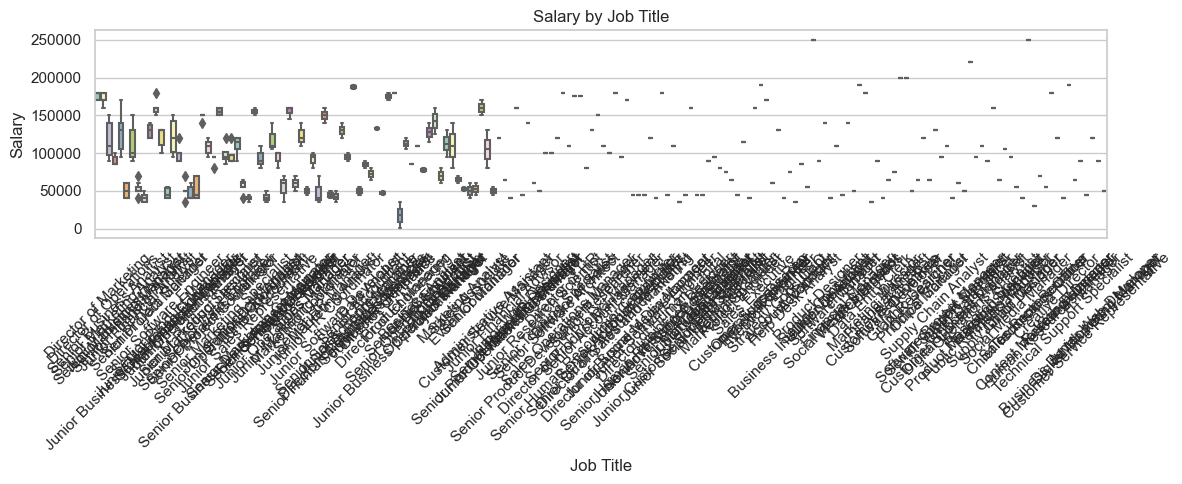

C:\Users\BHAGYASHREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


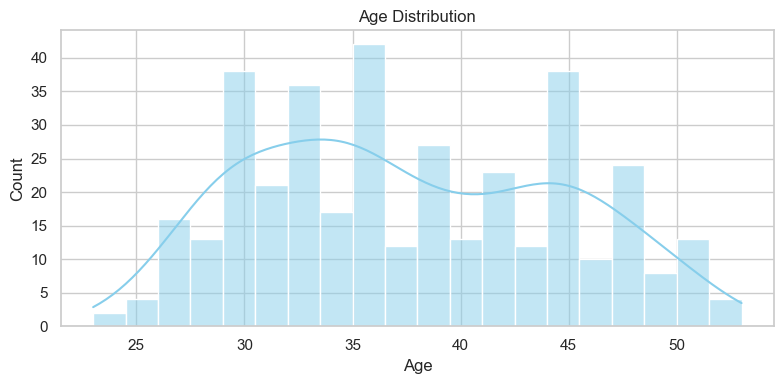

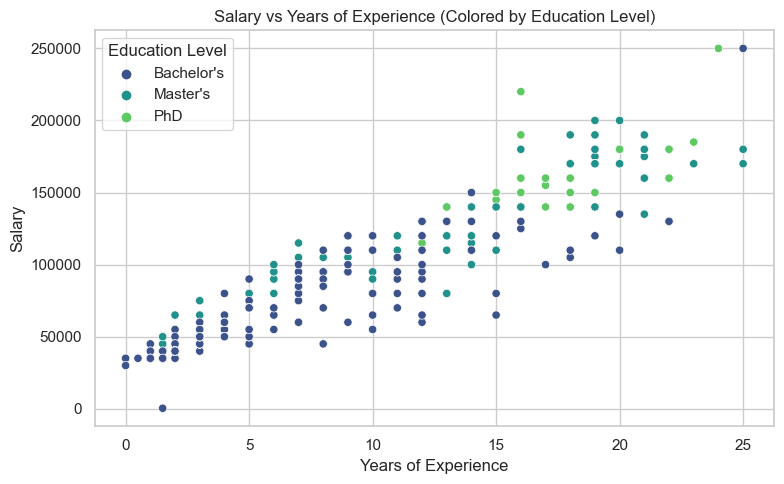

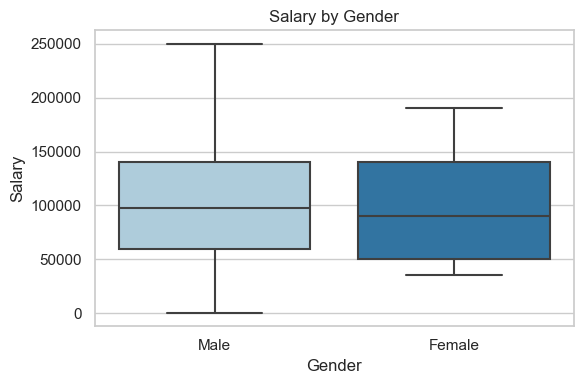

C:\Users\BHAGYASHREE\AppData\Local\Temp\ipykernel_12504\1148872626.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


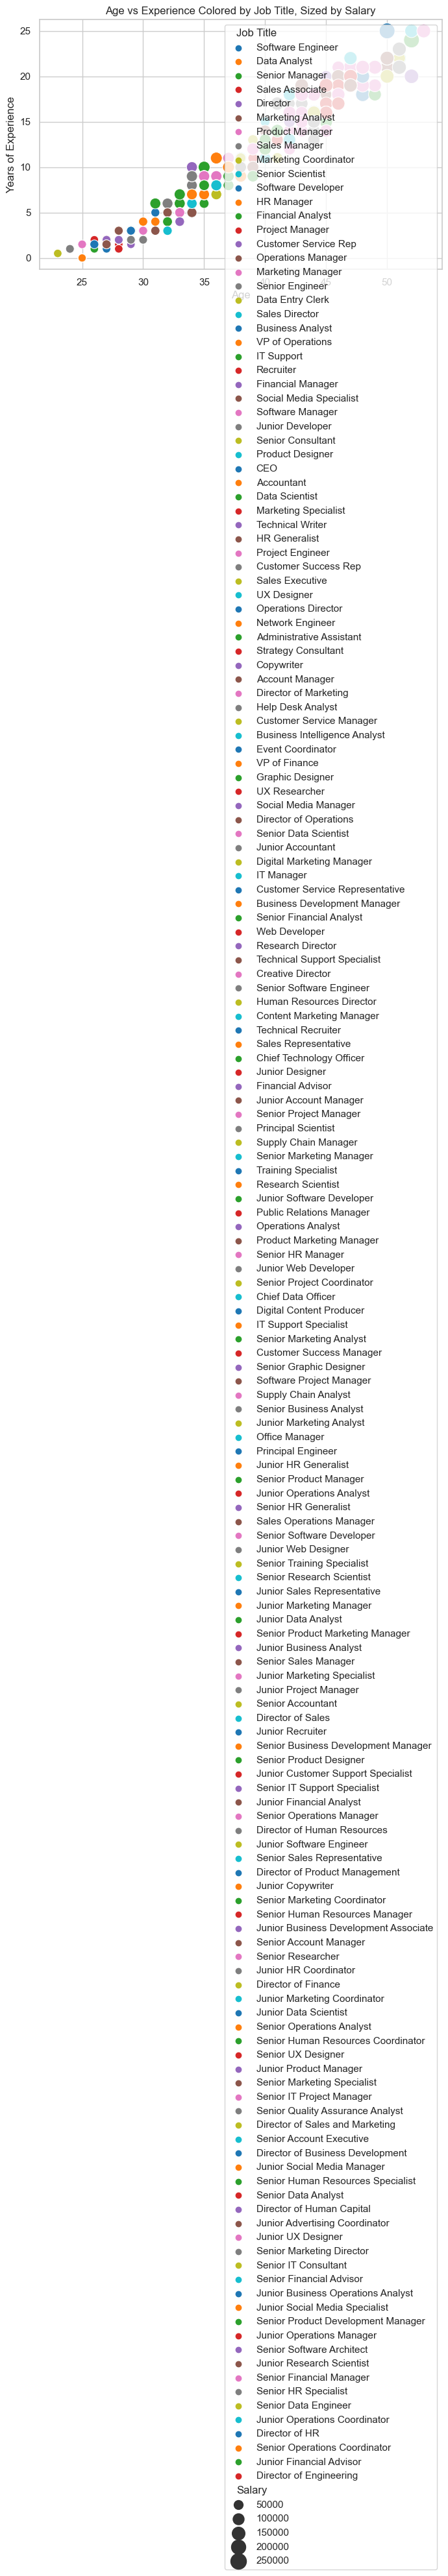

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("ds.csv")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Set visual style
sns.set(style="whitegrid")

# 1. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Distribution of Gender")
plt.tight_layout()
plt.savefig("gender_distribution.png")
plt.show()

# 2. Salary by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Education Level', y='Salary', palette='muted')
plt.title("Salary Distribution by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("salary_by_education.png")
plt.show()

# 3. Job Title Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Job Title', order=df['Job Title'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Job Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("job_title_distribution.png")
plt.show()

# 4. Salary by Job Title
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Job Title', y='Salary', order=df['Job Title'].value_counts().index, palette='Set3')
plt.title("Salary by Job Title")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("salary_by_job_title.png")
plt.show()

# 5. Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.tight_layout()
plt.savefig("age_distribution.png")
plt.show()

# 6. Years of Experience vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Education Level', palette='viridis')
plt.title("Salary vs Years of Experience (Colored by Education Level)")
plt.tight_layout()
plt.savefig("salary_vs_experience.png")
plt.show()

# 7. Salary by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Salary', palette='Paired')
plt.title("Salary by Gender")
plt.tight_layout()
plt.savefig("salary_by_gender.png")
plt.show()

# 8. Age vs Experience (Scatter with Salary)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Years of Experience', size='Salary', hue='Job Title', palette='tab10', sizes=(50, 300))
plt.title("Age vs Experience Colored by Job Title, Sized by Salary")
plt.tight_layout()
plt.savefig("age_experience_salary_bubble.png")
plt.show()


In [19]:
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["Education Level"] = le_edu.fit_transform(df["Education Level"])
df["Job Title"] = le_job.fit_transform(df["Job Title"])


In [20]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)


In [23]:
y_pred = model.predict(X_test)


In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 143564355.42
R² Score: 0.94


In [25]:
joblib.dump(model, "salary_predictor_model.pkl")


['salary_predictor_model.pkl']

C:\Users\BHAGYASHREE\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


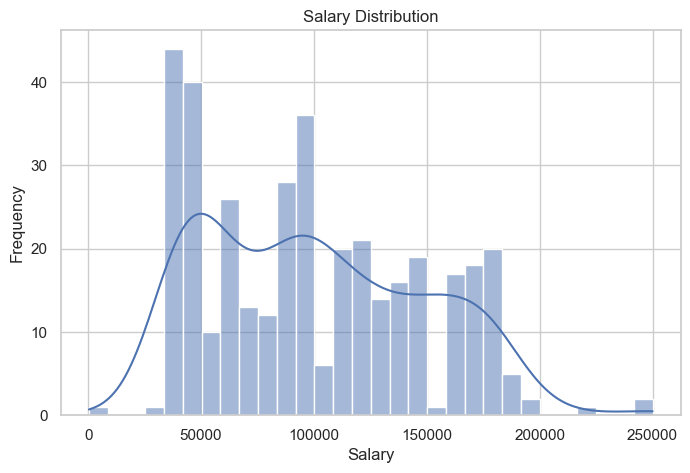

In [26]:
# Salary Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Salary"], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


In [27]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained classification model
model = joblib.load("salary_predictor_model.pkl")  # Make sure this model file exists

# Set Streamlit app config
st.set_page_config(
    page_title="Employee Salary Classification",
    page_icon="💼",
    layout="centered"
)

st.title("💼 Employee Salary Classification App")
st.markdown("This app predicts whether an employee's salary is **>100K** or **≤100K** based on input features.")

# -------------------------------------
# 🧠 Encoding Mappings (Match Model Training)
# -------------------------------------
gender_map = {'Male': 0, 'Female': 1}
education_map = {"Bachelor's": 0, "Master's": 1, "PhD": 2}
job_title_map = {
    "Software Engineer": 0,
    "Data Scientist": 1,
    "System Analyst": 2,
    "Project Manager": 3,
    "Business Analyst": 4,
    "DevOps Engineer": 5,
    "Database Administrator": 6,
    "Web Developer": 7,
    "Machine Learning Engineer": 8,
    "Network Engineer": 9
}

# -------------------------------------
# Sidebar: User Input
# -------------------------------------
st.sidebar.header("🧾 Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", list(gender_map.keys()))
education = st.sidebar.selectbox("Education Level", list(education_map.keys()))
job_title = st.sidebar.selectbox("Job Title", list(job_title_map.keys()))
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Display raw input
input_display_df = pd.DataFrame({
    "Age": [age],
    "Gender": [gender],
    "Education Level": [education],
    "Job Title": [job_title],
    "Years of Experience": [experience]
})
st.subheader("🔎 Input Summary")
st.dataframe(input_display_df)

# Encode input for prediction
encoded_input_df = pd.DataFrame({
    "Age": [age],
    "Gender": [gender_map[gender]],
    "Education Level": [education_map[education]],
    "Job Title": [job_title_map[job_title]],
    "Years of Experience": [experience]
})

# -------------------------------------
# 🔍 Predict Button
# -------------------------------------
if st.button("🔍 Predict Salary Class"):
    try:
        prediction = model.predict(encoded_input_df)
        st.success(f"🎯 Prediction: **{prediction[0]}**")
    except Exception as e:
        st.error(f"Error in prediction: {e}")

# ----------------------------------------------------
# 📂 Batch Prediction Section
# ----------------------------------------------------
st.markdown("---")
st.subheader("📂 Batch Prediction (Upload CSV)")

uploaded_file = st.file_uploader("Upload a CSV file with employee details", type=["csv"])

if uploaded_file is not None:
    try:
        batch_df = pd.read_csv(uploaded_file)
        st.write("📄 Uploaded Data Preview:")
        st.dataframe(batch_df.head())

        # Check required columns
        required_cols = ["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]
        if not all(col in batch_df.columns for col in required_cols):
            missing = [col for col in required_cols if col not in batch_df.columns]
            st.error(f"⚠️ Missing columns in CSV: {', '.join(missing)}")
        else:
            # Map categorical values
            batch_df["Gender"] = batch_df["Gender"].map(gender_map)
            batch_df["Education Level"] = batch_df["Education Level"].map(education_map)
            batch_df["Job Title"] = batch_df["Job Title"].map(job_title_map)

            if batch_df[required_cols].isnull().any().any():
                st.error("❌ Some values could not be encoded. Check for typos in categorical fields.")
            else:
                predictions = model.predict(batch_df[required_cols])
                batch_df["PredictedClass"] = predictions

                st.success("✅ Batch prediction complete!")
                st.dataframe(batch_df.head())

                # Download result
                csv = batch_df.to_csv(index=False).encode("utf-8")
                st.download_button(
                    label="⬇️ Download Results CSV",
                    data=csv,
                    file_name="salary_predictions.csv",
                    mime="text/csv"
                )
    except Exception as e:
        st.error(f"⚠️ Error processing the file: {e}")


Overwriting app.py


In [ ]:
!streamlit run app.py
